# Line Colors and Manipulations

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline 

import sys

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.3+intel.0
Python Version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Ran on 2019-12-06T16:11:42.782358



For the most part, the default colors are fine. But there are times when you may want custom colors or to repeat colors

## Custom Colors

Can be a mix of text (e.g. `r`) and tuples/lists

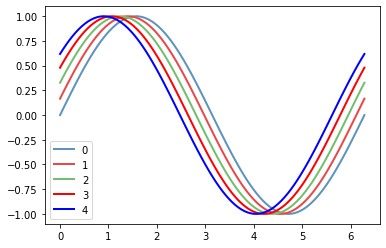

In [2]:
colors = [(0.36392156862745095, 0.5755294117647058, 0.7483921568627451),
          (0.9152941176470588, 0.2815686274509803, 0.2878431372549019),
          (0.44156862745098036, 0.7490196078431373, 0.432156862745098),
          'r',
          'b']
fig,ax = plt.subplots()
x = np.linspace(0,2*np.pi,100)
for ic,color in enumerate(colors):
    ax.plot(x,np.sin(x+ic*1.0/6),'-',color=color,linewidth=2,label=ic)
ax.legend()

## Repeat automatic colors

Note that the order of the colors hasn't changed. That is, when a color is specified, it does not change the color cycler

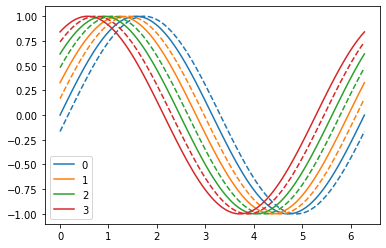

In [3]:
fig,ax = plt.subplots()
for ic in range(4):
    p = ax.plot(x,np.sin(x+ic*2.0/6),'-',label=ic)
    
    # Method one - if using this method, you do *not* need to set the `p` variable
    prev_color = ax.lines[-1].get_color()
    
    # Method 2
    assert prev_color == p[0].get_color() # This would fail it it weren't the case
    
    ax.plot(x,np.sin(x+(ic*2.0-1)/6),'--',color=prev_color)
ax.legend()

## Color Pallet Plots

Useful when deciding on colors

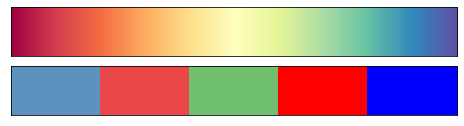

In [4]:
def palette_plot(pal,ax=None,autofig=False):
    """
    Plot the color palette specified. Note that this is adopted from the
    seaborn.palplot function

    Inputs:
    -------
    pal 
        colormap or list of colors to show
    
    Options:
    --------
    ax [plt.gca() or created]
        Axis on which to plot the colormap. See autofig below
    
    autofig [False]
        If true and ax is not specified, will make a new figure with
        a size more conducive to palette plots
    """

    if ax is None: # Make the 
        if autofig:
            fig,ax = plt.subplots(1, 1, figsize=(8,1))
        else:
            ax = plt.gca()
    
    if not isinstance(pal,mpl.colors.Colormap):
        pal = mpl.colors.ListedColormap(list(pal))
    
    n = 256
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=pal,interpolation="nearest", aspect="auto")
    ax.set(xticks=[],yticks=[],xticklabels=[],yticklabels=[])
    
fig,axes = plt.subplots(2,1,figsize=(8,2))

# A colormap
palette_plot(plt.cm.Spectral,ax=axes[0])

# A list of colors
colors = [(0.36392156862745095, 0.5755294117647058, 0.7483921568627451),
          (0.9152941176470588, 0.2815686274509803, 0.2878431372549019),
          (0.44156862745098036, 0.7490196078431373, 0.432156862745098),
          'r',
          'b']
palette_plot(colors,ax=axes[1])


## Color Manipulations

In [5]:
def brighten(color,frac=0.9):
    """
    Brighten (tint) color
    
    0 is white, 1 is no change
    """
    color = np.array(color,dtype=float)
    color = color * frac + (1.0-frac)    
    return color.tolist()
    
def darken(color,frac=0.1):
    """
    Darken (shade) color.
    
    1 is black, 0 is no change
    """
    color = np.array(color,dtype=float)
    color = color * (1.0-frac)    
    return color.tolist()

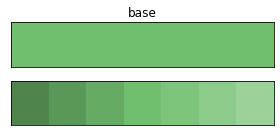

In [6]:
base = (0.44156862745098036, 0.7490196078431373, 0.432156862745098)
darker = [darken(base,f) for f in [0.3,0.2,0.1]]
brighter = [brighten(base,f) for f in [0.9,0.8,0.7]]

fig,axes = plt.subplots(2,1,figsize=(4,2))
palette_plot([base],ax=axes[0])
palette_plot(darker + [base] + brighter,ax=axes[1])

axes[0].set_title('base')
fig.tight_layout()

## Color of non-plot elements

This is personal preference, but sometimes it is nice to make the plot stand out by setting the color of everything else to be, for example, grey.

This demo also tries to set `z` axis (see below) but that is not needed for 2D

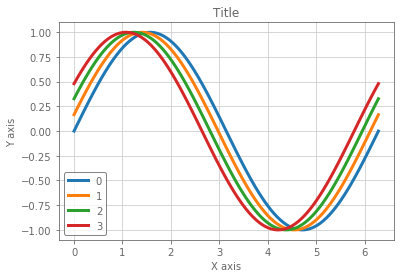

In [7]:
# Build the plot
fig,ax = plt.subplots()
ax.plot()
x = np.linspace(0,2*np.pi,100)
for ic in range(4):
    ax.plot(x,np.sin(x+ic/6),'-',LineWidth=3,label=ic)
ax.legend()
ax.grid()
ax.set(xlabel='X axis',ylabel='Y axis',title='Title')

#######
color = [0.4]*3
grid_color = [0.8]*3 # for the grid lines

if isinstance(color,(float,int)):
    color = [1.0*color]*3

# Ticks qnd labels
ax.tick_params(axis='y', colors=color)
ax.yaxis.get_offset_text().set_color(color) 
ax.yaxis.label.set_color(color)

ax.tick_params(axis='x', colors=color)
ax.xaxis.get_offset_text().set_color(color) 
ax.xaxis.label.set_color(color)

try:
    ax.tick_params(axis='z', colors=color)
    ax.zaxis.get_offset_text().set_color(color) 
    ax.zaxis.label.set_color(color)        
except:
    pass

ax.title.set_color(color)

# Legend
try:
    frame = ax.legend_.get_frame()
    frame.set_edgecolor(color)

    for text in ax.legend_.get_texts():
        text.set_color(color)
except AttributeError:
    pass # No legend

# Spines
for spine in ax.spines.values():
    spine.set_color(color) 

#Grid Lines -- Optional
for g in ax.get_xgridlines():
    g.set_color(grid_color)
for g in ax.get_ygridlines():
    g.set_color(grid_color)
try:
    for g in ax.get_zgridlines():
        g.set_color(grid_color)
except AttributeError:
    pass

# Ticks
for g in ax.get_xticklines():
    g.set_color(color)
for g in ax.get_yticklines():
    g.set_color(color)
try:
    for g in ax.get_zticklines():
        g.set_color(color)
except AttributeError:
    pass

ax.tick_params(color=color,which='minor')


